### Data Mining and Machine Learning
### Clustering I. Distances and Partitioning algorithms for clustering
### Edgar Acuna 
### Libraries: Susi, Biocluster, sklearn-som
### Datsets: Diabetes, Landast, Shuttle
### February 2022

In [162]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  I.  Computing distances for  Diabetes

In [163]:
url= "https://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)

(768, 9)


In [164]:
yd=data['class']
Xd=data.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(Xd)
Xd= scaler.transform(Xd)

In [165]:
#distancia Euclideana
dist2=pairwise_distances(Xd)
dist2.shape
dist2

array([[0.        , 3.22924385, 3.25837474, ..., 2.72463806, 2.97509995,
        3.4017847 ],
       [3.22924385, 0.        , 4.26273005, ..., 1.99408342, 2.6650958 ,
        0.91047974],
       [3.25837474, 4.26273005, 0.        , ..., 3.09591822, 3.29725594,
        4.32363443],
       ...,
       [2.72463806, 1.99408342, 3.09591822, ..., 0.        , 2.69881799,
        2.01762486],
       [2.97509995, 2.6650958 , 3.29725594, ..., 2.69881799, 0.        ,
        3.04917966],
       [3.4017847 , 0.91047974, 4.32363443, ..., 2.01762486, 3.04917966,
        0.        ]])

In [166]:
#Euclidean distance as a particular case of the Minkowski distance
dist_e=DistanceMetric.get_metric("minkowski",p=2)
dist_e.pairwise(Xd)

array([[0.        , 3.22924385, 3.25837474, ..., 2.72463806, 2.97509995,
        3.4017847 ],
       [3.22924385, 0.        , 4.26273005, ..., 1.99408342, 2.6650958 ,
        0.91047974],
       [3.25837474, 4.26273005, 0.        , ..., 3.09591822, 3.29725594,
        4.32363443],
       ...,
       [2.72463806, 1.99408342, 3.09591822, ..., 0.        , 2.69881799,
        2.01762486],
       [2.97509995, 2.6650958 , 3.29725594, ..., 2.69881799, 0.        ,
        3.04917966],
       [3.4017847 , 0.91047974, 4.32363443, ..., 2.01762486, 3.04917966,
        0.        ]])

In [167]:
# Manhattan distance, also called CityBlock
dist_maha=pairwise_distances(Xd,metric="cityblock")
dist_maha

array([[0.        , 7.48176212, 7.27315027, ..., 6.66185328, 6.52829826,
        7.206271  ],
       [7.48176212, 0.        , 8.54177411, ..., 4.42959032, 5.22414488,
        1.85434371],
       [7.27315027, 8.54177411, 0.        , ..., 7.48796614, 7.18435902,
        9.8953635 ],
       ...,
       [6.66185328, 4.42959032, 7.48796614, ..., 0.        , 6.63552353,
        4.98197366],
       [6.52829826, 5.22414488, 7.18435902, ..., 6.63552353, 0.        ,
        5.67721907],
       [7.206271  , 1.85434371, 9.8953635 , ..., 4.98197366, 5.67721907,
        0.        ]])

In [168]:
dist_maha=pairwise_distances(Xd,metric="manhattan")
dist_maha

array([[0.        , 7.48176212, 7.27315027, ..., 6.66185328, 6.52829826,
        7.206271  ],
       [7.48176212, 0.        , 8.54177411, ..., 4.42959032, 5.22414488,
        1.85434371],
       [7.27315027, 8.54177411, 0.        , ..., 7.48796614, 7.18435902,
        9.8953635 ],
       ...,
       [6.66185328, 4.42959032, 7.48796614, ..., 0.        , 6.63552353,
        4.98197366],
       [6.52829826, 5.22414488, 7.18435902, ..., 6.63552353, 0.        ,
        5.67721907],
       [7.206271  , 1.85434371, 9.8953635 , ..., 4.98197366, 5.67721907,
        0.        ]])

In [169]:
#Mahalanobois Distance
pairwise_distances(Xd,metric='mahalanobis',V=np.cov(Xd))

array([[0.        , 2.67179772, 3.92281266, ..., 3.03256335, 3.21533527,
        2.86196425],
       [2.67179772, 0.        , 4.66863038, ..., 2.2590797 , 2.85763359,
        1.08426449],
       [3.92281266, 4.66863038, 0.        , ..., 3.33784923, 4.65258168,
        4.3154311 ],
       ...,
       [3.03256335, 2.2590797 , 3.33784923, ..., 0.        , 3.43919951,
        1.99440627],
       [3.21533527, 2.85763359, 4.65258168, ..., 3.43919951, 0.        ,
        3.27918742],
       [2.86196425, 1.08426449, 4.3154311 , ..., 1.99440627, 3.27918742,
        0.        ]])

In [170]:
#Distancia correlation pero entre las columnas de Diabetes
distcor=pairwise_distances(Xd.T,metric="correlation")
distcor

array([[0.        , 0.87054133, 0.85871802, 1.08167177, 1.07353461,
        0.98231691, 1.03352267, 0.45565877],
       [0.87054133, 0.        , 0.84741041, 0.94267211, 0.66864289,
        0.77892893, 0.8626627 , 0.73648568],
       [0.85871802, 0.84741041, 0.        , 0.79262946, 0.91106662,
        0.71819471, 0.95873505, 0.76047205],
       [1.08167177, 0.94267211, 0.79262946, 0.        , 0.56321743,
        0.6074268 , 0.81607243, 1.11397026],
       [1.07353461, 0.66864289, 0.91106662, 0.56321743, 0.        ,
        0.80214094, 0.81492907, 1.04216295],
       [0.98231691, 0.77892893, 0.71819471, 0.6074268 , 0.80214094,
        0.        , 0.85935305, 0.96375813],
       [1.03352267, 0.8626627 , 0.95873505, 0.81607243, 0.81492907,
        0.85935305, 0.        , 0.96643869],
       [0.45565877, 0.73648568, 0.76047205, 1.11397026, 1.04216295,
        0.96375813, 0.96643869, 0.        ]])

In [171]:
#Correlation Distance  but between rows of Diabetes
distcor1=pairwise_distances(Xd,metric="correlation")
distcor1.shape

(768, 768)

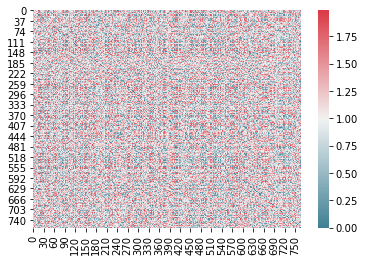

In [172]:
#Visualizando las distancias de correlation
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(distcor1, cmap=colormap, fmt=".2f")
plt.show()

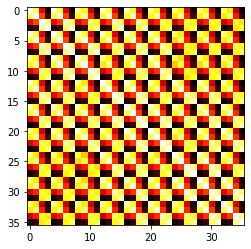

In [173]:
#Visualizing the correlation between columns of Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
#data = pd.read_table("hhtps//academic.uprm.edu/eacuna/landsat.txt", header=None,delim_whitespace=True)
Xl=data.iloc[:,0:36]
distcor=pairwise_distances(Xl.T,metric="correlation")
plt.imshow(1-distcor,cmap='hot')

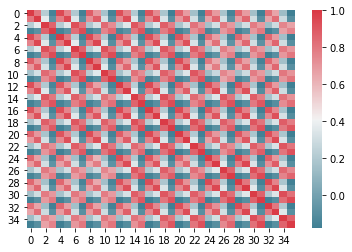

In [174]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(1-distcor, cmap=colormap, fmt=".2f")
plt.show()

### 2. Clustering using k-Means for Diabetes,k=2

In [175]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Xd)
clustlabels=kmeans.labels_
print(clustlabels)

[0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 

In [176]:
kmeans.cluster_centers_

array([[ 0.95874949,  0.43363662,  0.40679905, -0.14296386, -0.02520141,
         0.11848227,  0.03159628,  1.04966979],
       [-0.52576585, -0.23780073, -0.22308335,  0.07839954,  0.01382013,
        -0.06497415, -0.01732699, -0.57562537]])

In [177]:
#Finding the size of the two clusters formed
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[  0   1]
 [272 496]]


In [178]:
#Comparing the  clusters with the actual classes l
#pd.value_counts(yd.values, sort=False)
pd.crosstab(clustlabels,yd)

class,1,2
row_0,,
0,127,145
1,373,123


In [179]:
kmeans = KMeans(n_clusters=2, init='random', random_state=0).fit(Xd)
clustlabels1=kmeans.labels_
print(clustlabels1)

[1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 

### 3. Clustering using k-Means for Diabetes, k=3

In [180]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(Xd)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the three formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the three formed clusters
[[  0   1   2]
 [329 223 216]]


### 4. Applying k-Means to Landsat, k=6

In [181]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y1=data.iloc[:,36]
X1=data.iloc[:,0:36]
print(X1)

      0    1    2   3   4    5    6   7   8    9   ...   26   27  28   29  \
0     92  115  120  94  84  102  106  79  84  102  ...  134  104  88  121   
1     84  102  106  79  84  102  102  83  80  102  ...  128  100  84  107   
2     84  102  102  83  80  102  102  79  84   94  ...  113   87  84   99   
3     80  102  102  79  84   94  102  79  80   94  ...  104   79  84   99   
4     84   94  102  79  80   94   98  76  80  102  ...  104   79  84  103   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ...  ..  ...   
4430  56   64  108  96  64   71  108  96  68   75  ...  108   92  66   83   
4431  64   71  108  96  68   75  108  96  71   87  ...  108   96  66   87   
4432  68   75  108  96  71   87  108  88  71   91  ...  104   89  63   87   
4433  71   87  108  88  71   91  100  81  76   95  ...  104   89  70  100   
4434  71   91  100  81  76   95  108  88  80   95  ...  104   85  70   91   

       30   31  32   33   34  35  
0     128  100  84  107  113  87  
1    

In [182]:
scaler = StandardScaler()
scaler.fit(X1)
Xl= scaler.transform(X1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(Xl)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the clusters
[[   0    1    2    3    4    5]
 [ 770  601  382  975 1047  660]]


In [183]:
#size of the actual groups
pd.value_counts(y1.values, sort=False)

4     415
1    1072
5     470
2     479
6    1038
3     961
dtype: int64

### 5.  Kmeans applied to Shuttle, k=7

In [184]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)
#url="c://datamining//Shuttle.csv"
#data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       43500 non-null  int64
 1   1       43500 non-null  int64
 2   2       43500 non-null  int64
 3   3       43500 non-null  int64
 4   4       43500 non-null  int64
 5   5       43500 non-null  int64
 6   6       43500 non-null  int64
 7   7       43500 non-null  int64
 8   8       43500 non-null  int64
 9   9       43500 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


In [185]:
ys=data.iloc[:,9]
Xs=data.iloc[:,0:9]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(Xs)
Xs= scaler.transform(Xs)
kmeans = KMeans(n_clusters=7, random_state=0).fit(Xs)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[    0     1     2     3     4     5     6]
 [25659  6121  2468   710  8532     5     5]]


In [186]:
#Size of the actual classes
pd.value_counts(ys.values, sort=False)

1    34108
2       37
3      132
4     6748
5     2458
6        6
7       11
dtype: int64

### 6. PAM Clustering for Diabetes, k=2

In [187]:
print(Xd)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


#### Using Scikit-learn

In [188]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, method='pam',random_state=0).fit(Xd)
clustlabels1=kmedoids.labels_

In [189]:
kmedoids.cluster_centers_

array([[-0.54791859, -0.27837344, -0.05715025,  0.09180513,  0.12330164,
         0.26747239, -0.47378505, -0.61611067],
       [ 0.3429808 ,  0.1597866 ,  0.45982725,  0.40544544, -0.50186686,
        -0.30366421, -0.09929033,  0.57511787]])

In [190]:
#Finding the size of the two clusters formed
unique_elements, counts_elements = np.unique(clustlabels1, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[  0   1]
 [446 322]]


In [191]:
#Comparing the  clusters with the actual classes l
#pd.value_counts(yd.values, sort=False)
pd.crosstab(clustlabels1,yd)

class,1,2
row_0,,
0,335,111
1,165,157


### Using Biocluster

In [192]:
from Bio.Cluster import distancematrix
from Bio.Cluster import kmedoids
clusterid,error,c=kmedoids(dist2,nclusters=2)
#print(clusterid)
print('the within-cluster sum of distances for the returned PAM=',error)
unique_elements, counts_elements = np.unique(clusterid, return_counts=True)
print("Tamano de los two clusters formados")
print(np.asarray((unique_elements, counts_elements)))

the within-cluster sum of distances for the returned PAM= 1920.7912746867687
Tamano de los two clusters formados
[[122 444]
 [364 404]]


In [193]:
#Comparing the  clusters with the actual classes 
#pd.value_counts(y1.values, sort=False)
pd.crosstab(clusterid,yd)

class,1,2
row_0,,
122,243,121
444,257,147


### 7. Applying PAM clustering to Landsat

In [194]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
#url='c:/PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)
X=np.matrix(X)
dist2=pairwise_distances(X)
clusterid,error,c=kmedoids(dist2,nclusters=6)
clustlabels=kmeans.labels_
print('the within-cluster sum of distances for the returned PAM=',error)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los seis clusters formados")
print(np.asarray((unique_elements, counts_elements)))

the within-cluster sum of distances for the returned PAM= 11688.66349462829
Tamano de los seis clusters formados
[[    0     1     2     3     4     5     6]
 [25659  6121  2468   710  8532     5     5]]


### 8. Clustering for  Diabetes using SOM

#### Using Susi

In [195]:
import susi
som = susi.SOMClustering(n_rows=2,n_columns=1)
som.fit(Xd)
clusters = som.get_clusters(Xd)
x=[c[1] for c in clusters]
y=[c[0] for c in clusters]
xa=np.array(x)
ya=np.array(y)
clustlab=xa+ya
pd.crosstab(clustlab,yd)

class,1,2
row_0,,
0,364,78
1,136,190


#### Using Biocluster

In [196]:
from Bio.Cluster import somcluster
clusterid,celldata=somcluster(Xd,nxgrid=2,nygrid=1)
print(clusterid)
clus=pd.DataFrame(clusterid)
#comparing the clusters with the actual classes
pd.crosstab(clus.sum(axis=1),yd)

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


class,1,2
row_0,,
0,292,123
1,208,145


In [197]:
from sklearn_som.som import SOM
diab_som = SOM(m=2, n=1,dim=8)
diab_som.fit(Xd)
predictions = diab_som.predict(Xd)
predictions

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,

#### Using sklearn-som

In [198]:
from sklearn_som.som import SOM
diab_som = SOM(m=2, n=1,dim=8)
diab_som.fit(Xd)
predictions = diab_som.predict(Xd)
predictions
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print("Tamano de los two clusters formados")
print(np.asarray((unique_elements, counts_elements)))

Tamano de los two clusters formados
[[  0   1]
 [293 475]]


In [199]:
#Comparing the  clusters with the actual classes 
#pd.value_counts(y1.values, sort=False)
pd.crosstab(predictions,yd)

class,1,2
row_0,,
0,135,158
1,365,110


## 9. Clustering for Landsat using SOM

In [200]:
clusterid,celldata=somcluster(Xl,nxgrid=3,nygrid=2)
clus=pd.DataFrame(clusterid,columns=['A', 'B'])
#Finding the size of each cluster
clus = clus.groupby(clus.columns.tolist()).size().reset_index().rename(columns={0:'count'})
print( clus)

   A  B  count
0  0  0    562
1  0  1   1120
2  1  0    285
3  1  1    498
4  2  0   1286
5  2  1    684
